In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import IPython.display as display

from classes import *
from gen_utils import *
from tqdm import tqdm
from utils import *

# fix the seed for reproducibility
random.seed(42)

# minihack env creation with a .des file

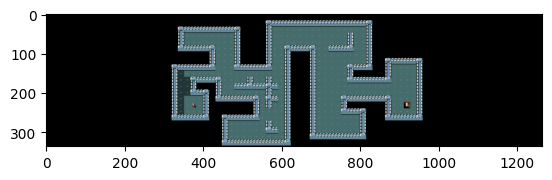

In [23]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "maps/complex_maze.des",
    max_episode_steps=10000,
)
state = env.reset()
#env.render()
plt.imshow(state['pixel'])

In [24]:
state = env.reset()
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

map = Map(game_map, start, target)

In [25]:
print(f"> start: {map.start}, target: {map.target}")

> start: (14, 23), target: (14, 57)


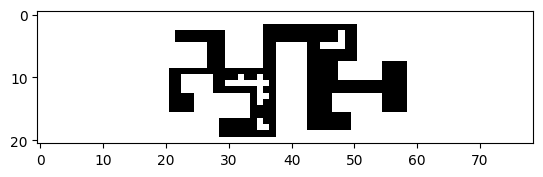

In [26]:
# print the map_matrix with matplotlib where the walls are black and the floor is white
plt.imshow(map.map_matrix, cmap='gray')
plt.show()


In [27]:
from pyswip import Prolog


In [28]:
PATH = 'kb/kb.pl'
KB = Prolog()
KB.consult(PATH)

In [29]:
KB.retractall("maze(_)")
KB.retractall("start(_,_)")
KB.asserta(f'maze({map.map_matrix})')
KB.asserta(f'start({map.start[0]}, {map.start[1]})')

In [30]:
for i in KB.query("maze(X)"):
    print(f'{i["X"]}\n')

#list(KB.query("maze(X)"))


[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# NTH1

In Prolog, `nth1/3` is a built-in predicate that is used to access elements in a list by index. The `nth1/3` predicate has the following form:

```prolog
nth1(Index, List, Element)
```
Index: The index of the element you want to access.

List: The list from which you want to access the element.

Element: The variable that will be unified with the element at the specified index.


In [31]:
result = list(KB.query("maze(M), nth1(14, M, Row), nth1(23, Row, Cell)"))
if result:
    cell_value = result[0]["Cell"]
    print(f"Cell value: {cell_value}")
else:
    print("Query result is empty.")

Cell value: 0


In [32]:
list(KB.query("start(ROW,COL)"))

[{'ROW': 14, 'COL': 23}]

In [33]:
list(KB.query(f"is_valid(10,23)"))

[{}]

In [34]:
list(KB.query(f"is_valid(9,23)"))

[]

In [35]:
solution = list(KB.query(f"is_valid(14,23)"))
if solution:
    print("Position is valid.")
else:
    print("Position is not valid.")

Position is valid.


In [36]:
list(KB.query(f"is_valid_action(11,23,0)"))

[{}]

In [37]:
list(KB.query(f"is_valid_action(10,23,0)"))

[]

In [38]:
#individual = Individual(random_nactions(), 1, map)

In [39]:
#individual.path[0] == map.start

# We have to decide if we want to generate a random path or random actions

random path $\Rightarrow$ a path of exactly n steps

random actions $\Rightarrow$ many action will be not valid $\Rightarrow$ the path will be shorter OR, as is implemented now, with many repetition of the same position.

# NOTE:
minihack wont crash if we input a not valid action starting from a valid action. It will simply not execute the action (as if we are playing), hence we are updating the path position with the same position.

In [41]:
Individual(random_nactions(300), 1, map)

Path: [(14, 22), (15, 22), (15, 21), (15, 21), (14, 21), (13, 21), (13, 22), (13, 21), (13, 21), (13, 21), (13, 21), (12, 21), (11, 21), (10, 21), (10, 21), (10, 21), (10, 22), (11, 22), (10, 22), (10, 21), (10, 21), (10, 21), (10, 21), (10, 21), (9, 21), (10, 21), (10, 22), (10, 21), (10, 21), (10, 21), (10, 21), (10, 22), (10, 21), (9, 21), (9, 21), (9, 21), (9, 21), (9, 21), (9, 22), (9, 23), (9, 22), (9, 22), (9, 22), (9, 22), (9, 23), (9, 22), (9, 21), (9, 22), (10, 22), (10, 22), (10, 21), (11, 21), (11, 21), (10, 21), (10, 21), (9, 21), (9, 21), (9, 22), (9, 22), (9, 23), (9, 23), (9, 24), (9, 24), (9, 24), (9, 25), (9, 25), (9, 26), (9, 26), (9, 26), (9, 25), (9, 25), (9, 25), (9, 25), (9, 25), (9, 26), (9, 26), (9, 26), (9, 27), (9, 28), (9, 27), (9, 27), (9, 28), (9, 29), (9, 30), (9, 31), (9, 32), (9, 32), (9, 33), (9, 32), (9, 32), (9, 31), (10, 31), (10, 31), (10, 31), (9, 31), (9, 32), (9, 33), (10, 33), (10, 33), (10, 34), (10, 34), (9, 34), (9, 35), (9, 34), (9, 33), (9

In [42]:
individual = Individual(random_nactions(300), 1, map)
individual1 = Individual(random_nactions(300), 1, map)
len(crossover_uniform(individual.actions, individual1.actions))

300

In [46]:
# no need to call raw count_loops function anymore
individual.path.loops, individual1.path.loops

(277, 271)

In [47]:
(individual.path)

In [51]:
# create first generation
MAX_GENERATIONS = 100
MAX_INDIVIDUALS = 100
best_individuals = []

print("> Creating initial population...")
individuals = [Individual(random_nactions(300), 1, map) for _ in range(MAX_INDIVIDUALS)]
individuals.sort(key=lambda x: x.fitness, reverse=True)
#print(f'best_individual: {individuals[0].fitness}')
print("> Evolving...")

for generation in tqdm(range(MAX_GENERATIONS)):

    best_fitness = individuals[0].fitness
    best_individuals.append(individuals[0]) 
    if generation % 10 == 0:
        print(f'best_individual in generation {generation}: fitness: {best_fitness}, wrong actions: {individuals[0].wrong_actions}, loops: {individuals[0].path.loops}')

    # take 2 best individuals -> maybe can be replaced with probability distribution based on fitness
    # also roulette wheel selection.
    child1, child2 = individuals[0].actions, individuals[1].actions
    offspring = [crossover_uniform(child1, child2) for _ in range(MAX_INDIVIDUALS)]
    offspring = [mutate(child, valid_actions_bitmap(map.start, path_from_actions(map.map, map.start, child))) for child in offspring]

    individuals[2:] = [Individual(offspring[i], generation+1, map) for i in range(MAX_INDIVIDUALS-2)]
    individuals.sort(key=lambda x: x.fitness, reverse=True)

    # print every individual fitness
    """for i in range(MAX_INDIVIDUALS):
        print(f"Individual {i} fitness: {individuals[i].fitness}")
"""
    # print(f"Generation {generation}: best score {best_fitness:.2f}")
    """
    if best_fitness == 0:
        zero_fitness.append(population[0][0])"""
best_fitness = individuals[0].fitness
best_individuals.append(individuals[0])
print(f'best_individual in generation {generation}: {best_fitness}, wrong actions: {individuals[0].wrong_actions}')



> Creating initial population...
> Evolving...


  0%|          | 0/100 [00:00<?, ?it/s]

best_individual in generation 0: fitness: -8928, wrong actions: 62, loops: 248


 12%|█▏        | 12/100 [00:01<00:11,  7.91it/s]

best_individual in generation 10: fitness: -6722, wrong actions: 31, loops: 238


 22%|██▏       | 22/100 [00:02<00:09,  7.88it/s]

best_individual in generation 20: fitness: -6356, wrong actions: 20, loops: 254


 31%|███       | 31/100 [00:03<00:09,  7.46it/s]

best_individual in generation 30: fitness: -4500, wrong actions: 49, loops: 221


 41%|████      | 41/100 [00:05<00:07,  7.48it/s]

best_individual in generation 40: fitness: -4500, wrong actions: 49, loops: 221


 51%|█████     | 51/100 [00:06<00:06,  7.16it/s]

best_individual in generation 50: fitness: -3400, wrong actions: 48, loops: 174


 61%|██████    | 61/100 [00:08<00:05,  7.09it/s]

best_individual in generation 60: fitness: -3400, wrong actions: 48, loops: 174


 71%|███████   | 71/100 [00:09<00:03,  7.39it/s]

best_individual in generation 70: fitness: -3130, wrong actions: 37, loops: 180


 81%|████████  | 81/100 [00:10<00:02,  7.12it/s]

best_individual in generation 80: fitness: -3130, wrong actions: 37, loops: 180


 91%|█████████ | 91/100 [00:12<00:01,  7.12it/s]

best_individual in generation 90: fitness: -3130, wrong actions: 37, loops: 180


100%|██████████| 100/100 [00:13<00:00,  7.38it/s]

best_individual in generation 99: -3130, wrong actions: 37


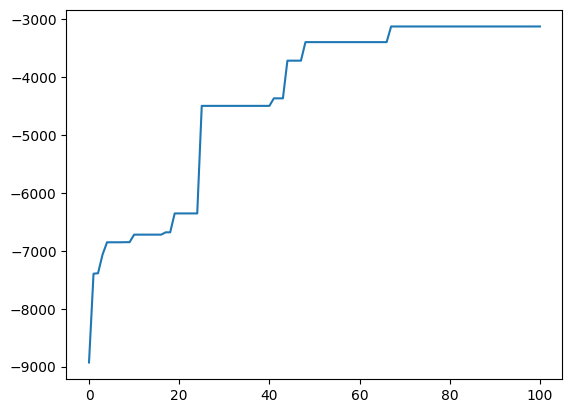

In [52]:
# Plot for each generation the best fitness
best_fitness = [best_individuals[i].fitness for i in range(len(best_individuals))]
plt.plot(best_fitness)

In [ ]:
individuals[3].generation

TypeError: 'Path' object is not subscriptable

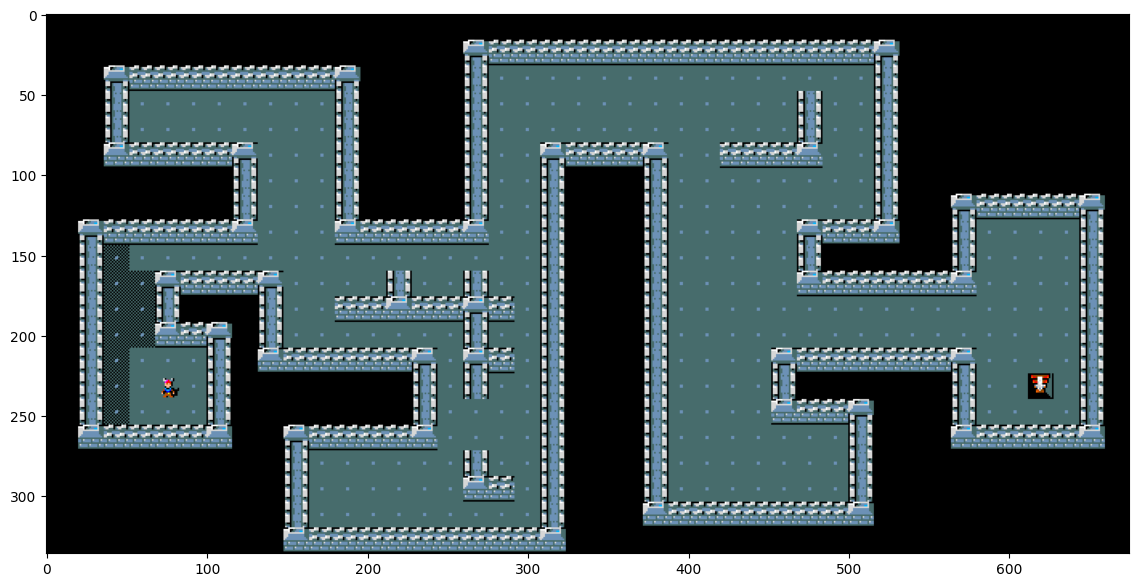

In [53]:
env.reset()
plt.rcParams['figure.figsize'] = [17, 7]

image = plt.imshow(game[:, 300:975])
# for generation, path in enumerate(best_paths):
# plt.title(f"Generation {generation}, fitness: {best_scores[generation]:.2f}, last move: {path[-1]}")
#start = best_paths[0]
#path = best_paths[-1]
actions = []
actions = individuals[0].actions
wrong = 0

for i, action in enumerate(actions):
    try: 
        s, _, _, _ = env.step(action)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.title(f"Generation {individuals[0].generation}, fitness: {individuals[0].fitness}, current position: {individuals[0].path[i]}, action: {action}, wrong actions: {wrong}, action: {i+1}/{len(actions)}")
        image.set_data(s['pixel'][:, 300:975])
        #time.sleep(0.1)
        if individuals[0].path[i] == map.target:
            print('YOU WON! <3')
            break
        if individuals[0].path[i] == individuals[0].path[i-1]:
            wrong += 1
    except RuntimeError:
        print('YOU WON! <3')

In [ ]:
target

In [ ]:
"""MAX_GENERATIONS = 1000
MAX_INDIVIDUALS = 100

best_scores =[]
best_paths = []
zero_fitness = []

# create a list of individuals, starting with random moves (illegal actions filtered out)
print("> Creating initial population...")
individuals = [random_nsteps(game_map, start, target) for _ in range(MAX_INDIVIDUALS)]
best_fitness = np.inf

print("> Evolving...")
for generation in tqdm(range(MAX_GENERATIONS)):
    
    generation_scores = []

    #fitnesses = [fitness_function(individual, checkpoints, generation) for individual in individuals]
    #fitness_function = lambda path: abs(path[-1][0] - target[0]) + abs(path[-1][1] - target[1])

    ind_actions = [actions_from_path(start, ind) for ind in individuals]
    generation_scores.append(min(fitnesses))

    # this is a list of tuples (individual, fitness). individual is a list of moves
    population = list(zip(individuals, fitnesses))
    actions =  list(zip(ind_actions, fitnesses))

    # sorting the population by best fitness (lower is better)
    population.sort(key=lambda x: x[1])
    actions.sort(key=lambda x:x[1])
    # sort ind_actions with respect to population
    
    #print(f"best score: {population[0][1]:.2f}")

    # take 2 best individuals -> maybe can be replaced with probability distribution based on fitness
    # also roulette wheel selection.

    child1, child2, = actions[0][0], actions[1][0]

    offspring = [crossover(child1, child2) for _ in range(MAX_INDIVIDUALS)]
    offspring = [mutate(child) for child in offspring]
    ind_actions = offspring
    individuals = [path_from_actions(game_map, start, child) for child in offspring]

    best_fitness = population[0][1]
    best_scores.append(population[0][1])    
    best_paths.append(population[0][0])
    #print(f"Generation {generation}: best score {best_fitness:.2f}")

    if best_fitness == 0:
        zero_fitness.append(population[0][0])
    
# print best score and best path
best_idx = np.argmin(best_scores)
print(f"Best score: {best_scores[best_idx]:.2f}")
print(f"Best path: {best_paths[best_idx]}")
print(f"generation of best path: {best_idx}")"""